[294.65 296.45 297.85 299.55 301.05 302.65 304.15 305.65 306.95 308.25
 309.35 310.65 311.65 312.75 313.75 314.65 315.55 316.45 317.25 317.95
 318.75 319.45 320.25 320.95 321.55 322.15 322.65 323.15]


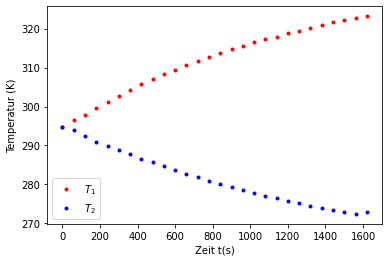

In [133]:
import matplotlib.pyplot as plt
import numpy as np

t, T1, T2 = np.genfromtxt('temp.txt', unpack=True, skip_header=1)
print(T1)

plt.plot(t, T1, '.r', label = "$T_{1}$")
plt.plot(t, T2, '.b', label = "$T_{2}$")
plt.xlabel(r'Zeit t(s)')
plt.ylabel(r'Temperatur (K)')
plt.legend(loc="lower left")

plt.show()

Ausgleichsrechung:

T1:
A = (-6.6217 ± 0.1407) 10**-6
B = (0.0281 ± 0.0002)
C = (294.7858 ± 0.0825)
T2:
A = (4.6346 ± 0.1811) 10**-6
B = (-0.0214 ± 0.0003)
C = (294.8097 ± 0.1062)


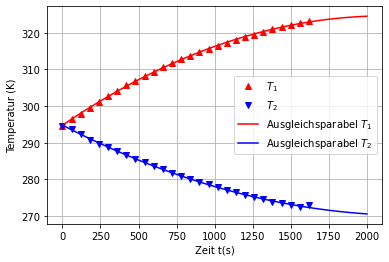

In [134]:
from scipy.optimize import curve_fit
from decimal import Decimal 
import pandas as pd
from uncertainties import ufloat # Für den Gaußfehler (?)

# Nicht-lineare Ausgleichsfunktion
def f(x, a, b, c):
    return a* (x**2) + b * x + c

# curve fit
param1, pcov1 = curve_fit(f, t, T1)
param2, pcov2 = curve_fit(f, t, T2)
# Parameter zusammenfassen
a1, b1, c1 = param1
a2, b2, c2 = param2

unc1 = np.sqrt(np.diag(pcov1))
unc2 = np.sqrt(np.diag(pcov2))
fa1, fb1, fc1 = unc1
fa2, fb2, fc2 = unc2

a1_mu = a1*10**6
a2_mu = a2*10**6
fa1_mu = fa1*10**6
fa2_mu = fa2*10**6

print('T1:')
print('A = (%.4f ± %.4f) 10**-6' % (a1_mu, fa1_mu)) # mu = 10**-6
print('B = (%.4f ± %.4f)' % (b1, fb1)) 
print('C = (%.4f ± %.4f)' % (c1, fc1))

print("T2:")
print('A = (%.4f ± %.4f) 10**-6' % (a2_mu, fa2_mu)) # mu = 10**-6
print('B = (%.4f ± %.4f)' % (b2, fb2)) 
print('C = (%.4f ± %.4f)' % (c2, fc2))

x = np.linspace(0, 2000, 500)
y1 = f(x, a1, b1, c1)
y2 = f(x, a2, b2, c2)
plt.plot(t, T1, '^r', label = "$T_{1}$")
plt.plot(t, T2, 'vb', label = "$T_{2}$")
plt.plot(x, y1, '-r', label = "Ausgleichsparabel $T_{1}$")
plt.plot(x, y2, '-b', label = "Ausgleichsparabel $T_{2}$")
plt.xlabel(r'Zeit t(s)')
plt.ylabel(r'Temperatur (K)')
plt.legend(loc="best")
plt.grid(True)

Lineare Regression für (p_b,T_1):

\begin{tabular}{c c c}
\toprule
{} &      Wert &  Fehler \\
\midrule
Steigung m        & -2651.537 &  97.560 \\
Achsenabschnitt b &     9.203 &   0.313 \\
\bottomrule
\end{tabular}

L = (22046.074 +- 811.158)


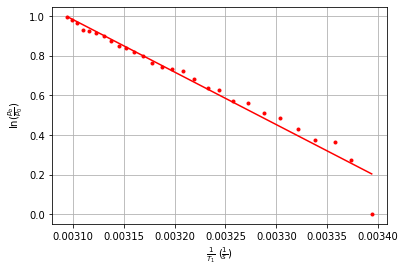

In [135]:
messdaten = pd.read_excel("messdaten.xlsx")
pb = messdaten.iloc[:,[4, 9]] 
np.savetxt('pb.txt', pb.values, header='T1(K) p_b(Pa)', fmt='%f')
T1, pb = np.genfromtxt('pb.txt', unpack=True, skip_header=1)
rT1 = 1/T1
p0 = pb[0]
xx = rT1
yy = np.log((pb/p0))
plt.plot(xx, yy, '.r')

# Nicht-lineare Ausgleichsfunktion
def g(x, a, b):
    return a * x + b

para, pcov = curve_fit(g, rT1, yy)
pcov = np.sqrt(np.diag(pcov))
para = np.round(para, 3)
pcov = np.round(pcov, 3)
a, b = para
fa, fb = pcov  
R = 8.3144508

dreg = {'Wert': para, 'Fehler': pcov}
dfreg = pd.DataFrame(data = dreg, index = ['Steigung m', 'Achsenabschnitt b'])
print(dfreg.to_latex(index = True, column_format= "c c c"))
plt.plot(rT1, g(rT1, a, b), '-r')

plt.xlabel(r'$\frac{1}{T_{1}}$ ($\frac{1}{s}$)')
plt.ylabel(r'ln($\frac{p_{b}}{p_{0}}$)')

plt.grid(True)

ba = -a*R
bfa =  fa*R 
L = ba
print('L = (%.3f +- %.3f)' % (ba, bfa))

Differentialquotienten für 4 Temperature in tex:

In [147]:
import pandas as pd

temp = messdaten.iloc[[5, 10, 15, 20],[0, 4, 5]] 
np.savetxt('temp4.txt', temp.values, header='t T1 T2', fmt='%.2f')
t, T1, T2 = np.genfromtxt('temp4.txt', unpack=True, skip_header=1)

def diff(x, a, b):
    return 2*a*x + b

dT1 = diff(t, a1, b1) 
dT1 = np.round(dT1, 4)
fdT1 = np.sqrt((2*t*fa1)**2 + fb1**2) # Gauß-Fehler
fdT1 = np.round(fdT1, 4)
print(fdT1)

dT2 = diff(t, a2, b2) 
dT2 = np.round(dT2, 4)
fdT2 = diff(t, fa2, fb2) # Gauß-Fehler
fdT2 = np.round(fdT2, 4)

d1 = {'Zeit t(s)': t, 'T1(K)': T1, 'dT1/dt': dT1, 'fdT1/dt': fdT1} 
d2 = {'Zeit t(s)': t, 'T2(K)': T2, 'dT2/dt': dT2, 'fdT2/dt': fdT2} 

df1 = pd.DataFrame(data = d1)
df2 = pd.DataFrame(data = d2)

print(df1.to_latex(index = False, column_format= "c c c c"))
print(df2.to_latex(index = False, column_format= "c c c c"))

[0.0003 0.0003 0.0003 0.0004]
\begin{tabular}{c c c c}
\toprule
 Zeit t(s) &  T1(K) &  dT1/dt &  fdT1/dt \\
\midrule
     300.0 & 302.65 &  0.0241 &   0.0003 \\
     600.0 & 309.35 &  0.0202 &   0.0003 \\
     900.0 & 314.65 &  0.0162 &   0.0003 \\
    1200.0 & 318.75 &  0.0122 &   0.0004 \\
\bottomrule
\end{tabular}

\begin{tabular}{c c c c}
\toprule
 Zeit t(s) &  T2(K) &  dT2/dt &  fdT2/dt \\
\midrule
     300.0 & 288.75 & -0.0186 &   0.0004 \\
     600.0 & 283.75 & -0.0158 &   0.0005 \\
     900.0 & 279.35 & -0.0130 &   0.0006 \\
    1200.0 & 275.85 & -0.0103 &   0.0007 \\
\bottomrule
\end{tabular}



Güteziffern in tex:

In [137]:
messdaten = pd.read_excel("messdaten.xlsx")
leist4 = messdaten.iloc[[5, 10, 15, 20],[10]] 
np.savetxt('leist4.txt', leist4.values, header='t P(W)', fmt='%f')
P4 = np.genfromtxt('leist4.txt', unpack=True, skip_header=1)

def nuid (t1, t2):
    return t1/(t1-t2)

def nuemp (cw, ck, dt, n):
    return (cw + ck)*dt/n

CW = 12546
CK = 750

nu_id = nuid(T1, T2)
nu_id = np.round(nu_id, 3)
nu_emp = nuemp(CW, CK, dT1, P4)
nu_emp = np.round(nu_emp, 3)

# Gauß-Fehler
fnu_emp = nuemp(CW, CK, fdT1, P4)
fnu_emp = np.round(fnu_emp, 3)

abw = (1- nu_emp/nu_id)*100
abw = np.round(abw, 2)
#print(abw)

dnu = {'Zeit t(s)': t, 'Güteziffer (Theorie)': nu_id, 'Güteziffer (empirisch)': nu_emp, 'Gauß-Fehler': fnu_emp, 'Abweichung (%)': abw}
dfnu = pd.DataFrame(data = dnu)
print(dfnu.to_latex(index = False, column_format= "c c c c c"))

\begin{tabular}{c c c c c}
\toprule
 Zeit t(s) &  Güteziffer (Theorie) &  Güteziffer (empirisch) &  Gauß-Fehler &  Abweichung (\%) \\
\midrule
     300.0 &                21.773 &                   2.563 &        0.032 &           88.23 \\
     600.0 &                12.084 &                   2.149 &        0.043 &           82.22 \\
     900.0 &                 8.914 &                   1.873 &        0.058 &           78.99 \\
    1200.0 &                 7.430 &                   1.411 &        0.069 &           81.01 \\
\bottomrule
\end{tabular}



Massendurchsatz mit L aus weiter oben:

In [138]:
dQ2_dt = (CW + CK)*dT2
# print('dQ2_dt :', dQ2_dt)

massd = nuemp(CW, CK, dT2, L)
massd = np.round(massd, 4)
# print('massd :', massd)

cl2f2c_mol = 120.91
massd_g = massd * cl2f2c_mol
massd_g = np.round(massd_g, 4)
print('massd_g :', massd_g)

# Gauß-Fehler
fmassd = nuemp(CW, CK, fdT2, bfa)
fmassd = np.round(fmassd, 4)
fmassd_g = fmassd * cl2f2c_mol
fmassd_g = np.round(fmassd_g, 4)

dmd = {'Zeit t': t, 'dQ2/dt': dQ2_dt, 'dm/dt (mol/s)': massd, 'fdm/dt (mol/s)': fmassd, 'dm/dt (g/s)': massd_g, 'fdm/dt (g/s)': fmassd_g}
dfmd = pd.DataFrame(data = dmd)
print(dfmd.to_latex(index = False, column_format= "c c c c c c"))


massd_g : [-1.3542 -1.1486 -0.9431 -0.7496]
\begin{tabular}{c c c c c c}
\toprule
 Zeit t &    dQ2/dt &  dm/dt (mol/s) &  fdm/dt (mol/s) &  dm/dt (g/s) &  fdm/dt (g/s) \\
\midrule
  300.0 & -247.3056 &        -0.0112 &          0.0066 &      -1.3542 &        0.7980 \\
  600.0 & -210.0768 &        -0.0095 &          0.0082 &      -1.1486 &        0.9915 \\
  900.0 & -172.8480 &        -0.0078 &          0.0098 &      -0.9431 &        1.1849 \\
 1200.0 & -136.9488 &        -0.0062 &          0.0115 &      -0.7496 &        1.3905 \\
\bottomrule
\end{tabular}



Dichte und Leistung in tex:

In [145]:
druck = messdaten.iloc[[5, 10, 15, 20],[0, 5, 8, 9]] 
np.savetxt('druck.txt', druck.values, header='t T2(K) p_a p_b', fmt='%f')
druck = np.genfromtxt('druck.txt', unpack=True, skip_header=1)
t, T2, pa, pb = druck
rho_0 = 5.51
p0 = 100000
T0 = 273.15
k = 1.14

rho = (rho_0*T0*pa)/(T2*p0)
rho = np.round(rho, 3)

N_mech = (1/(k-1)) * ((pb * (pa/pb)**(1/k)) - pa) * (1/rho) * (massd_g/1000)
N_mech = np.round(N_mech, 3)

# Gauß-Fehler (irgendwie sehr sehr groß?)
fN_mech = (1/(k-1)) * ((pb * (pa/pb)**(1/k)) - pa) * (1/rho) * ((massd_g+fmassd_g)/1000)
fN_mech = np.round(fN_mech, 3)

dd = {'Zeit t(s)': t, 'Dichte rho (g/m**3)': rho, 'Leisung N (W)': N_mech, 'f N (W)': fN_mech}
dfd = pd.DataFrame(data = dd)
print(dfd.to_latex(index = False, column_format= "c c c c"))

\begin{tabular}{c c c c}
\toprule
 Zeit t(s) &  Dichte rho (g/m**3) &  Leisung N (W) &  f N (W) \\
\midrule
     300.0 &               23.455 &        -12.969 &   -5.327 \\
     600.0 &               20.156 &        -17.510 &   -2.395 \\
     900.0 &               18.318 &        -18.232 &    4.674 \\
    1200.0 &               16.368 &        -17.607 &   15.054 \\
\bottomrule
\end{tabular}



In [146]:
from uncertainties import unumpy


b = ufloat(5,0.236)
x = np.linspace(0,100,1000)
y = 5*x
popt, pcov = curve_fit(g,x)

array([5.0+/-0.236, 5.4004004004004+/-0.24124884975894187,
       5.8008008008008005+/-0.25635138002368946,
       6.201201201201201+/-0.2797160481454588,
       6.601601601601602+/-0.3094771722764059,
       7.002002002002002+/-0.34397846989355724,
       7.402402402402402+/-0.38193752154043537,
       7.802802802802804+/-0.42242320957851415,
       8.203203203203204+/-0.4647757315531879,
       8.603603603603604+/-0.5085288667430923,
       9.004004004004004+/-0.5533504775467819,
       9.404404404404405+/-0.5990007585233214,
       9.804804804804805+/-0.6453038675242867,
       10.205205205205205+/-0.6921287952340337,
       10.605605605605607+/-0.7393764074965153,
       11.006006006006007+/-0.7869705774378201,
       11.406406406406408+/-0.834852036329315,
       11.806806806806808+/-0.8829740485391498,
       12.207207207207208+/-0.9312993252676901,
       12.607607607607608+/-0.9797977909316381,
       13.008008008008009+/-1.028444944566799,
       13.408408408408409+/-1.0772206